# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<a id="2"></a>
# <p style="padding:10px;background-color:orange;margin:0;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">About Dataset</p>

Dataset ini berisi informasi data preferensi pengguna dari 73.516 pengguna di 12.294 anime.

**anime.csv**

* **anime_id :** myanimelist.net's unique id identifying an anime.
* **name :** full name of anime.
* **genre :** comma separated list of genres for this anime.
* **type :** movie, TV, OVA, etc.
* **episodes :** how many episodes in this show. (1 if movie).
* **rating :** average rating out of 10 for this anime.
* **members :** number of community members that are in this anime's
"group".

**rating.csv**

* **user_id :** non identifiable randomly generated user id.
* **anime_id :** the anime that this user has rated.
* **rating :** rating out of 10 this user has assigned (-1 if the user watched it but didn't assign a rating).

In [ ]:
anime = pd.read_csv("anime.csv")
rating = pd.read_csv("rating.csv")


# Melihat Sekilas Isi Dataset


**Mari kita lihat sekilas data anime.**

In [ ]:
print(f"Shape of The Anime Dataset : {anime.shape}")
print(f"\nGlimpse of The Dataset :")
anime.head().style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

Shape of The Anime Dataset : (12294, 7)

Glimpse of The Dataset :


,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.370000,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Military, Shounen",TV,64,9.260000,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen",TV,51,9.250000,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.170000,673572
4,9969,Gintama',"Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen",TV,51,9.160000,151266


In [ ]:
print(f"Informations About Anime Dataset :\n")
print(anime.info())

Informations About Anime Dataset :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB
None


**Mari kita lihat sekilas data rating.**

In [ ]:
print(f"Shape of The Rating Dataset : {rating.shape}")
print(f"\nGlimpse of The Dataset :")
rating.head().style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

Shape of The Rating Dataset : (7813737, 3)

Glimpse of The Dataset :


,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [ ]:
print(f"Informations About Rating Dataset :\n")
print(rating.info())

Informations About Rating Dataset :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB
None


# Preprocessing


In [ ]:
print(f"Summary of The Anime Dataset :")
anime.describe()

Summary of The Anime Dataset :


,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


In [ ]:
anime.describe(include=object)

,name,genre,type,episodes
count,12294,12232,12269,12294
unique,12292,3264,6,187
top,Shi Wan Ge Leng Xiaohua,Hentai,TV,1
freq,2,823,3787,5677


In [ ]:
print("Null Values of Anime Dataset :")
anime.isna().sum().to_frame()

Null Values of Anime Dataset :


,0
anime_id,0
name,0
genre,62
type,25
episodes,0
rating,230
members,0


In [ ]:
print("After Dropping, Null Values of Anime Dataset :")
anime.dropna(axis = 0, inplace = True)
anime.isna().sum().to_frame()
anime.shape

After Dropping, Null Values of Anime Dataset :


(12017, 7)

In [ ]:
dup_anime = anime[anime.duplicated()].shape[0]
print(f"There are {dup_anime} duplicate entries among {anime.shape[0]} entries in anime dataset.")

There are 0 duplicate entries among 12017 entries in anime dataset.


In [ ]:
print(f"Summary of The Rating Dataset :")
rating.describe().T

Summary of The Rating Dataset :


,count,mean,std,min,25%,50%,75%,max
user_id,7813737.0,36727.956745,20997.946119,1.0,18974.0,36791.0,54757.0,73516.0
anime_id,7813737.0,8909.072104,8883.949636,1.0,1240.0,6213.0,14093.0,34519.0
rating,7813737.0,6.144030,3.727800,-1.0,6.0,7.0,9.0,10.0


In [ ]:
print("Null Values of Rating Dataset :")
rating.isna().sum().to_frame()

Null Values of Rating Dataset :


,0
user_id,0
anime_id,0
rating,0


In [ ]:
dup_rating = rating[rating.duplicated()].shape[0]
print(f"There are {dup_rating} duplicate entries among {rating.shape[0]} entries in rating dataset.")

rating.drop_duplicates(keep='first',inplace=True)
print(f"\nAfter removing duplicate entries there are {rating.shape[0]} entries in this dataset.")

There are 1 duplicate entries among 7813737 entries in rating dataset.

After removing duplicate entries there are 7813736 entries in this dataset.


# Menyatukan Data Anime dan Data Rating

In [ ]:
fulldata = pd.merge(anime,rating,on="anime_id",suffixes= [None, "_user"])
fulldata = fulldata.rename(columns={"rating_user": "user_rating"})

print(f"Shape of The Merged Dataset : {fulldata.shape}")
print(f"\nGlimpse of The Merged Dataset :")

fulldata.head()

Shape of The Merged Dataset : (7813610, 9)

Glimpse of The Merged Dataset :


,anime_id,name,genre,type,episodes,rating,members,user_id,user_rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278,-1


# Menampilkan Data

In [ ]:
sns.set_style("white")
sns.set_context("poster",font_scale = .7)

palette = ["#1d7874","#679289","#f4c095","#ee2e31","#ffb563","#918450","#f85e00","#a41623","#9a031e","#d6d6d6","#ffee32","#ffd100","#333533","#202020"]


## Top Anime Community


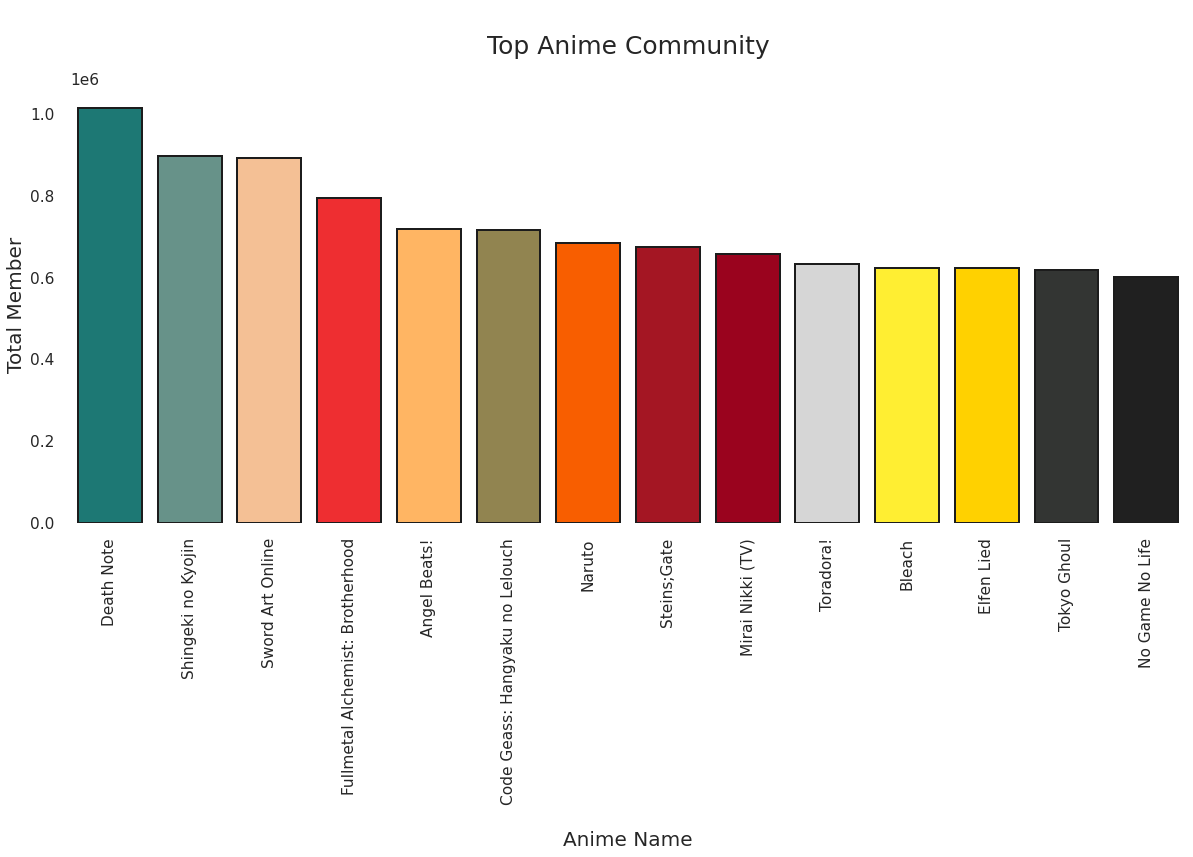

In [ ]:
top_anime = fulldata.copy()
top_anime.drop_duplicates(subset ="name", keep = "first", inplace = True)
top_anime_temp1 = top_anime.sort_values(["members"],ascending=False)

plt.subplots(figsize=(20,8))
p = sns.barplot(x=top_anime_temp1["name"][:14],y=top_anime_temp1["members"],palette=palette, saturation=1, edgecolor = "#1c1c1c", linewidth = 2)
p.axes.set_title("\nTop Anime Community\n", fontsize=25)
plt.ylabel("Total Member" , fontsize = 20)
plt.xlabel("\nAnime Name" , fontsize = 20)
plt.xticks(rotation = 90)



sns.despine(left=True, bottom=True)
plt.show()

## Anime Category


In [ ]:
print("Anime Categories :")
top_anime_temp1["type"].value_counts()

Anime Categories :


TV         3402
OVA        3090
Movie      2111
Special    1581
ONA         526
Music       451
Name: type, dtype: int64

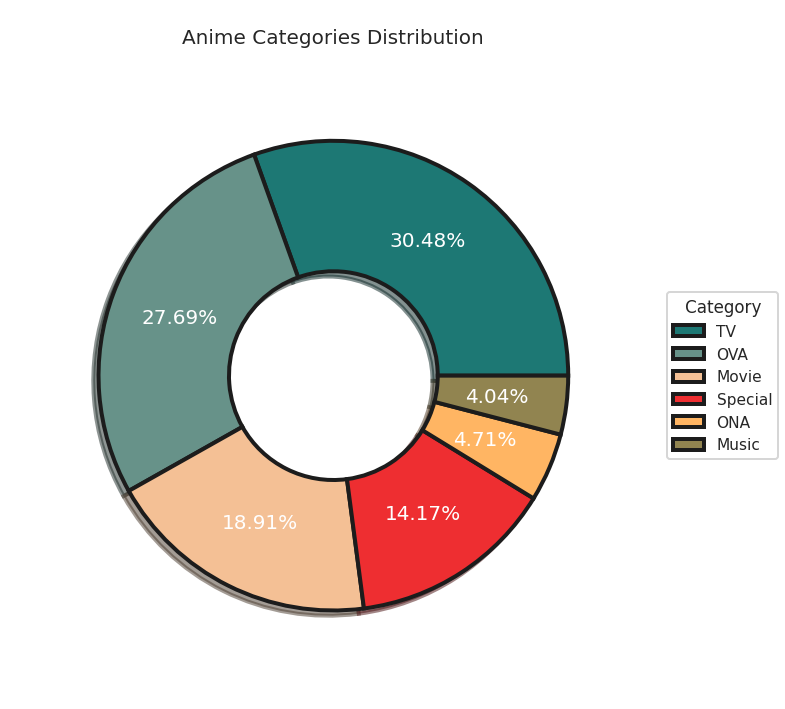

In [ ]:
plt.subplots(figsize=(12, 12))

labels = "TV","OVA","Movie","Special","ONA","Music"
size = 0.5

wedges, texts, autotexts = plt.pie([len(top_anime_temp1[top_anime_temp1["type"]=="TV"]["type"]),
                                    len(top_anime_temp1[top_anime_temp1["type"]=="OVA"]["type"]),
                                    len(top_anime_temp1[top_anime_temp1["type"]=="Movie"]["type"]),
                                    len(top_anime_temp1[top_anime_temp1["type"]=="Special"]["type"]),
                                    len(top_anime_temp1[top_anime_temp1["type"]=="ONA"]["type"]),
                                    len(top_anime_temp1[top_anime_temp1["type"]=="Music"]["type"])],
                                    explode = (0,0,0,0,0,0),
                                    textprops=dict(size= 20, color= "white"),
                                    autopct="%.2f%%", 
                                    pctdistance = 0.7,
                                    radius=.9, 
                                    colors = palette, 
                                    shadow = True,
                                    wedgeprops=dict(width = size, edgecolor = "#1c1c1c", 
                                    linewidth = 4),
                                    startangle = 0)

plt.legend(wedges, labels, title="Category",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("\nAnime Categories Distribution",fontsize=20)
plt.show()

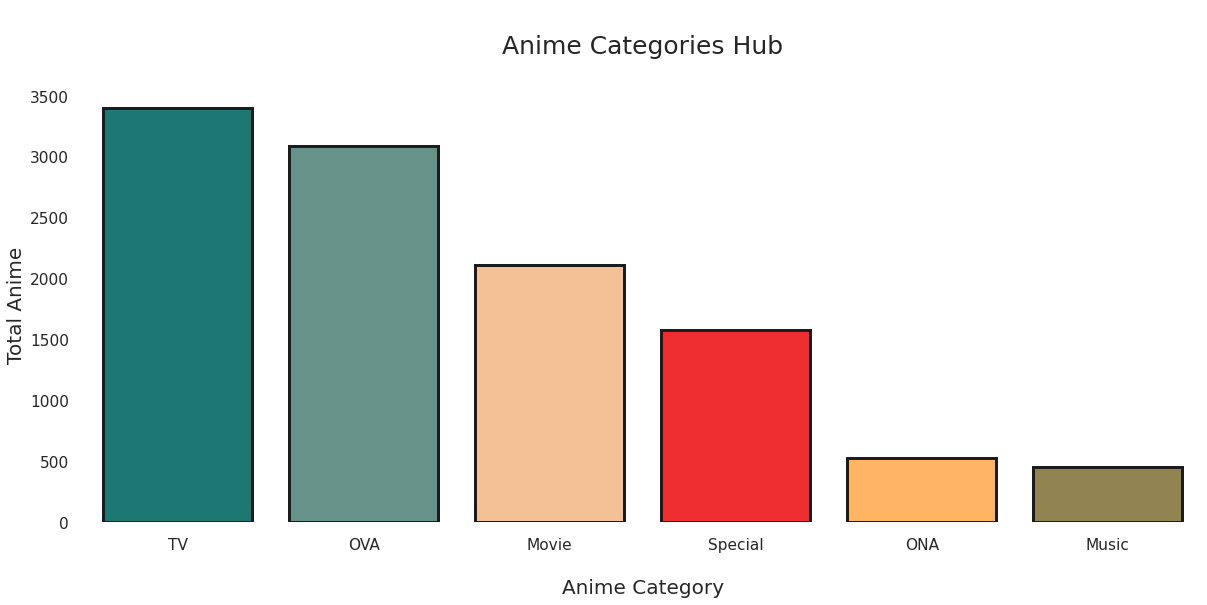

In [ ]:
plt.subplots(figsize = (20,8))
p = sns.countplot(x = top_anime_temp1["type"], order = top_anime_temp1["type"].value_counts().index, palette = palette, saturation = 1, edgecolor = "#1c1c1c", linewidth = 3)
p.axes.set_title("\nAnime Categories Hub\n" ,fontsize = 25)
plt.ylabel("Total Anime" ,fontsize = 20)
plt.xlabel("\nAnime Category" ,fontsize = 20)
plt.xticks(rotation = 0)

sns.despine(left = True, bottom = True)
plt.show()

## Overall Anime Ratings


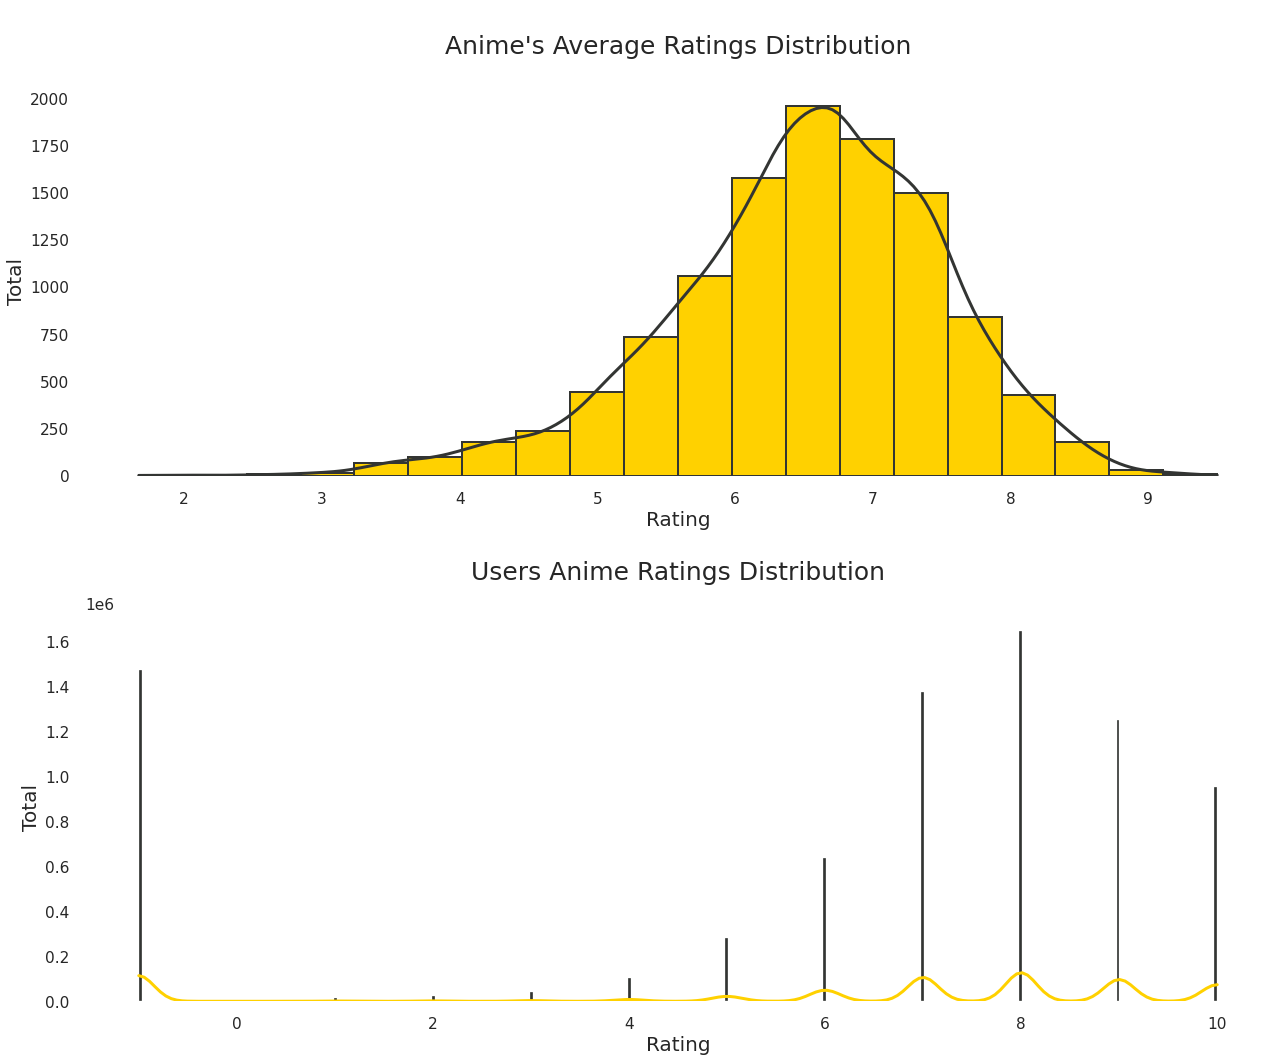

In [ ]:
top_anime_temp2 = top_anime.sort_values(["rating"],ascending=False)

_, axs = plt.subplots(2,1,figsize=(20,16),sharex=False,sharey=False)
plt.tight_layout(pad=6.0)

sns.histplot(top_anime_temp2["rating"],color=palette[11],kde=True,ax=axs[0],bins=20,alpha=1,fill=True,edgecolor=palette[12])
axs[0].lines[0].set_color(palette[12])
axs[0].set_title("\nAnime's Average Ratings Distribution\n",fontsize = 25)
axs[0].set_xlabel("Rating\n", fontsize = 20)
axs[0].set_ylabel("Total", fontsize = 20)

sns.histplot(fulldata["user_rating"],color=palette[12],kde=True,ax=axs[1],bins="auto",alpha=1,fill=True)
axs[1].lines[0].set_color(palette[11])
axs[1].set_title("\n\n\nUsers Anime Ratings Distribution\n",fontsize = 25)
axs[1].set_xlabel("Rating", fontsize = 20)
axs[1].set_ylabel("Total", fontsize = 20)

sns.despine(left=True, bottom=True)
plt.show()

# Preprocessing setelah dataset digabung


In [ ]:
data = fulldata.copy()
data["user_rating"].replace(to_replace = -1 , value = np.nan ,inplace=True)
data = data.dropna(axis = 0)
print("Null values after final pre-processing :")
data.isna().sum().to_frame()

Null values after final pre-processing :


,0
anime_id,0
name,0
genre,0
type,0
episodes,0
rating,0
members,0
user_id,0
user_rating,0


In [ ]:
selected_users = data["user_id"].value_counts()
data = data[data["user_id"].isin(selected_users[selected_users >= 50].index)]

In [ ]:
data_pivot_temp = data.pivot_table(index="name",columns="user_id",values="user_rating").fillna(0)
data_pivot_temp.head()

user_id,3,5,7,11,14,17,21,23,24,27,...,73495,73499,73500,73501,73502,73503,73504,73507,73510,73515
name,,,,,,,,,,,,,,,,,,,,,
&quot;0&quot;,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0
&quot;Bungaku Shoujo&quot; Memoire,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0
&quot;Bungaku Shoujo&quot; Movie,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0
&quot;Eiji&quot;,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


ada banyak simbol jepang dan simbol aneh lainnya, jadi kita hilangkan terlebih dahulu

In [ ]:
import re
def text_cleaning(text):
    text = re.sub(r'&quot;', '', text)
    text = re.sub(r'.hack//', '', text)
    text = re.sub(r'&#039;', '', text)
    text = re.sub(r'A&#039;s', '', text)
    text = re.sub(r'I&#039;', 'I\'', text)
    text = re.sub(r'&amp;', 'and', text)
    
    return text

data["name"] = data["name"].apply(text_cleaning)

In [ ]:
data_pivot = data.pivot_table(index="name",columns="user_id",values="user_rating").fillna(0)
print("After Cleaning the animes names, let's see how it looks like.")
data_pivot.head()

After Cleaning the animes names, let's see how it looks like.


user_id,3,5,7,11,14,17,21,23,24,27,...,73495,73499,73500,73501,73502,73503,73504,73507,73510,73515
name,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
009 Re:Cyborg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
009-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
009-1: RandB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<a id="14"></a>
# <p style="padding:10px;background-color:orange;margin:0;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Collaborative Recommender</p>


In [ ]:
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

data_matrix = csr_matrix(data_pivot.values)

model_knn = NearestNeighbors(metric = "cosine", algorithm = "brute")
model_knn.fit(data_matrix)

query_no = np.random.choice(data_pivot.shape[0])
print(f"We will find recommendation for {query_no} no anime which is {data_pivot.index[query_no]}.")
distances, indices = model_knn.kneighbors(data_pivot.iloc[query_no,:]

We will find recommendation for 8893 no anime which is Tonight.


In [ ]:
no = []
name = []
rating = []

for i in range(0, len(distances.flatten())):
    if i == 0:
        print(f"Recommendations for {data_pivot.index[query_no]} viewers :\n")
    else:
        no.append(i)
        name.append(data_pivot.index[indices.flatten()[i]])
        distance.append(distances.flatten()[i])
        rating.append(*anime[anime["name"]==data_pivot.index[indices.flatten()[i]]]["rating"].values)

dic = {"No" : no, "Anime Name" : name, "Rating" : rating}
recommendation = pd.DataFrame(data = dic)
recommendation.set_index("No", inplace = True)
recommendation

Recommendations for Tonight viewers :



,Anime Name,Rating
No,,
1,Seichou Rap,4.93
2,Juicy Jungle,3.56
3,Joukyou Monogatari,5.40
4,Joki Joki Tailor,4.06
5,Ari to Hato (1959),4.74


<a id="15"></a>
# <p style="padding:10px;background-color:orange;margin:0;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Content Based Recommender</p>


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfv = TfidfVectorizer(min_df=3, max_features=None, strip_accents="unicode", analyzer="word",
                      token_pattern=r"\w{1,}", ngram_range=(1, 3), stop_words = "english")

rec_data = fulldata.copy()
rec_data.drop_duplicates(subset ="name", keep = "first", inplace = True)
rec_data.reset_index(drop = True, inplace = True)
genres = rec_data["genre"].str.split(", | , | ,").astype(str)
tfv_matrix = tfv.fit_transform(genres)

In [ ]:
from sklearn.metrics.pairwise import sigmoid_kernel

sig = sigmoid_kernel(tfv_matrix, tfv_matrix)

rec_indices = pd.Series(rec_data.index, index = rec_data["name"]).drop_duplicates()


# Recommendation Function
def give_recommendation(title, sig = sig):
    
    idx = rec_indices[title]

    sig_score = list(enumerate(sig[idx]))
    sig_score = sorted(sig_score, key=lambda x: x[1], reverse=True)
    sig_score = sig_score[1:11]
    anime_indices = [i[0] for i in sig_score]
     
    rec_dic = {"No" : range(1,11), 
               "Anime Name" : anime["name"].iloc[anime_indices].values,
               "Rating" : anime["rating"].iloc[anime_indices].values}
    dataframe = pd.DataFrame(data = rec_dic)
    dataframe.set_index("No", inplace = True)
    
    print(f"Recommendations for {title} viewers :\n")
    
    return dataframe

In [ ]:
give_recommendation("Kimi no Na wa.")

Recommendations for Kimi no Na wa. viewers :



,Anime Name,Rating
No,,
1,Densetsu Kyojin Ideon: Sesshoku-hen,6.37
2,Mousou Kagaku Series: Wandaba Style,6.18
3,Love Stage!!,7.69
4,Hunter x Hunter: Greed Island,8.33
5,Hataraku Maou-sama!,8.03
6,Code Geass: Boukoku no Akito 4 - Nikushimi no ...,7.55
7,Danna ga Nani wo Itteiru ka Wakaranai Ken,7.55
8,Qin Shiming Yue Zhi: Zhu Zi Bai Jia,7.49
9,Saint Seiya: Tenkai-hen Josou - Overture,7.42


In [ ]:
give_recommendation("Fullmetal Alchemist: Brotherhood")

Recommendations for Fullmetal Alchemist: Brotherhood viewers :



,Anime Name,Rating
No,,
1,City Hunter 2,8.12
2,Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#...,8.34
3,Garo: Honoo no Kokuin,7.51
4,Pankunchi,5.95
5,Gunnm,7.26
6,Binbougami ga!,7.88
7,Bakegyamon,6.84
8,Peeping Life Movie: We Are The Hero,5.10
9,Angel Beats! Specials,7.79
